<a href="https://colab.research.google.com/github/JorgeCandido/ImersaoDados/blob/main/DesafioImersaoDadosAula05_Corre%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá a todos,

Hoje teremos o maerial da última aula da semana de imersão de dados promovida pela **ALURA Cursos Online"".

Na aula de ontem foram apresentados alguns conceitos básicos de **machine learning** e aplicamos alguns métodos de aprendizado e predição baseados nos dados do ENEM 2019.

Abaixo podemos ver um compilado do que foi feito na última aula:

In [ ]:
### Importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#------------------------------------------------------------------------------#
### Importar dados do ENEM
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)  # importa os dados compartilhados (modo CSV - comma separated values) e disponibiliza no código como DataFrame

#------------------------------------------------------------------------------#
### Criar variável
# Listar colunas desejadas com as notas das provas
notas = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# Somar as notas das provas e formar uma coluna nova
dados['SOMA_NOTAS']=dados[notas].sum(axis=1) 

#------------------------------------------------------------------------------#
### limpar base de dados
# Eliminar NaN da base de dados
dados_limpos =dados[notas].dropna()

# Lita de colunas de input
entrada = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
#lista de colunas de outputs
saida = 'NU_NOTA_MT'

In [ ]:
# DFs que serão utilizados (dados sem notas NaN)
notas_entrada = X = dados_limpos[entrada]
notas_entrada = y = dados_limpos[saida]

#------------------------------------------------------------------------------#
### Iniciar o processo de ML
# Definir um SEED para evitar variabilidade do processo
seed=4321

# Dividir os dados em modelo de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=seed)

# Selecionar o modelo e treinar
modelo_LinearSVR = LinearSVR(random_state=seed)

# Treinar modelo
modelo_LinearSVR.fit(X_train, y_train)
y_prev_LinearSVR = modelo_LinearSVR.predict(X_test)
print(mse(y_test, y_prev_LinearSVR))
print(mae(y_test, y_prev_LinearSVR))

8249.650542929467
71.66538001482824


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Quando criamos o **seed** o objetivo era diminuir a aleatoreidade do modelo e sua dependência da amostra utilizada. Contudo, sempre que fizermos um modelo e não utilizarmos o **seed** teremos um erro diferente de erro, como podemos ver abaixo:

In [ ]:
# Selecionar o modelo e treinar
modelo_LinearSVR = LinearSVR()

# Treinar modelo
modelo_LinearSVR.fit(X_train, y_train)
y_prev_LinearSVR = modelo_LinearSVR.predict(X_test)
print(mse(y_test, y_prev_LinearSVR))
print(mae(y_test, y_prev_LinearSVR))

6137.90103884087
63.20620745392984


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Selecionar o modelo e treinar
modelo_LinearSVR = LinearSVR()

# Treinar modelo
modelo_LinearSVR.fit(X_train, y_train)
y_prev_LinearSVR = modelo_LinearSVR.predict(X_test)
print(mse(y_test, y_prev_LinearSVR))
print(mae(y_test, y_prev_LinearSVR))

8227.23296703544
73.87621469596453


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Uma das formas de diminuir a dependência que o modelo possui pela **seed** aplicada é o uso de um outro modelo: a árvore de decisões (**DecisionTreeRegressor**)


In [ ]:
# Importar modelo
from sklearn.tree import DecisionTreeRegressor
# escolher modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth = 3)
# Treinar modelo
modelo_DecisionTreeRegressor.fit(X_train, y_train)
# Prever resultado
y_DecisionTreeRegressor = modelo_DecisionTreeRegressor.predict(X_test)
print(mse(y_test, y_DecisionTreeRegressor))
print(mae(y_test, y_DecisionTreeRegressor))

6020.959074272204
62.24737685990148


In [ ]:
# Importar modelo
from sklearn.tree import DecisionTreeRegressor
# escolher modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth = 3)
# Treinar modelo
modelo_DecisionTreeRegressor.fit(X_train, y_train)
# Prever resultado
y_DecisionTreeRegressor = modelo_DecisionTreeRegressor.predict(X_test)
print(mse(y_test, y_DecisionTreeRegressor))
print(mae(y_test, y_DecisionTreeRegressor))

6020.959074272204
62.247376859901564


Como podemos ver, o **DecisionTreeRegressor** diminuiu significantemente a variabilidade da simulação, porém continuamos com a possibilidade de variação devido às amostras, como podemos ver abaixo.

In [ ]:
### Iniciar o processo de ML
# Dividir os dados em modelo de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Importar modelo
from sklearn.tree import DecisionTreeRegressor
# escolher modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth = 3)
# Treinar modelo
modelo_DecisionTreeRegressor.fit(X_train, y_train)
# Prever resultado
y_DecisionTreeRegressor = modelo_DecisionTreeRegressor.predict(X_test)
print(mse(y_test, y_DecisionTreeRegressor))
print(mae(y_test, y_DecisionTreeRegressor))

6020.573305842066
62.12782714848413


In [ ]:
### Iniciar o processo de ML
# Dividir os dados em modelo de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Importar modelo
from sklearn.tree import DecisionTreeRegressor
# escolher modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth = 3)
# Treinar modelo
modelo_DecisionTreeRegressor.fit(X_train, y_train)
# Prever resultado
y_DecisionTreeRegressor = modelo_DecisionTreeRegressor.predict(X_test)
print(mse(y_test, y_DecisionTreeRegressor))
print(mae(y_test, y_DecisionTreeRegressor))

6063.577602608717
62.281456343581475


Uma forma de diminuir a influência da quebra dos dados na previsão do modelo é através da validação cruzada (**cross_validate**).

A validação funciona assim: os dados são quebrados em vários subgrupos, assim, são feitos testes de numero igual à quantidade de quebra dos dados em seguida é calculada uma média da qualidade dos modelos

Para entender melhor o processod evalidação cruzada, recomenda-se dar uma olhada no link a seguir:

        Referência para cross validation:
            https://scikit-learn.org/stable/modules/cross_validation.html



In [ ]:
from sklearn.model_selection import cross_validate
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
cross_validate(modelo_DecisionTreeRegressor, X, y)

{'fit_time': array([0.06217837, 0.05285859, 0.05195761, 0.05074048, 0.05354571]),
 'score_time': array([0.00235057, 0.00219774, 0.0022049 , 0.00221181, 0.00219178]),
 'test_score': array([0.44040436, 0.46935099, 0.44677289, 0.48505061, 0.40158969])}

Como é possível ver, o **cross_validade** retorna um dictionary contendo 3 parametros:

    fit_time: tempo treino e teste dos dados para cada divisão
    score_time: tempo para calcular o score de cada divisão
    test_score: a medida de qualidade do modelo para cada divisão

É possível ver que o test_score não é nada parecido com os valores que estávamos acostumados até agora. Isso é devido à métrica utilizada no **cross_validate** que por padrão é a **r2**. Para que tenhamos a mesma métrica que usamos nos modelos anteriores temos que mudar o parâmetro **scoring** para **mean_square_error** ou **mean_absolute_error**

        Referência métricas
            https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

        Referência métrica r2
            https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

Para selecionar o **mean sqare error** ou o **mean absolute error**, de acordo com a documentação, precisamos selecionar respectivamente **'neg_mean_squared_error'** e **'neg_mean_absolute_error'** (entre aspas mesmo, pois o input desse parâmetro é uma **str**)

Esses valores de erro são negativos por conta de uma lógica de otimização que existe dentro do **scikit-learning** de quanto maior o número, melhor ele é (isso é aplicado no **r2** que pode serna melhor das hipóteses 1).

Assim, dado que para **mean sqare error** e **mean absolute error** o melhor resultado possível é erro=0, a lógica do códicgo fica preservada.


In [ ]:
from sklearn.model_selection import cross_validate
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
cross_validate(modelo_DecisionTreeRegressor, X, y, scoring='neg_mean_squared_error')

{'fit_time': array([0.05703235, 0.05198812, 0.05284095, 0.05781555, 0.0587163 ]),
 'score_time': array([0.00188422, 0.00192142, 0.00186634, 0.00202441, 0.0018568 ]),
 'test_score': array([-6329.37154527, -6390.89060392, -6519.6529336 , -6701.92070777,
        -6863.49700731])}

In [ ]:
cross_validate(modelo_DecisionTreeRegressor, X, y, scoring='neg_mean_absolute_error')

{'fit_time': array([0.05663967, 0.05228305, 0.05472732, 0.05552936, 0.05317092]),
 'score_time': array([0.00191522, 0.00189281, 0.00190616, 0.00192213, 0.0018878 ]),
 'test_score': array([-63.86347402, -64.01502372, -64.77772852, -65.78585991,
        -66.32013482])}

Como pudemos notar, a validação cruzada tem por padrão 5 divisões. Se quisermos mudar essa divisão, podemos alterar o parâmetro **cv** que indica o número de divisões que desejamos

In [ ]:
cross_validate(modelo_DecisionTreeRegressor, X, y,cv=10,
               scoring='neg_mean_squared_error')

{'fit_time': array([0.06950665, 0.06245112, 0.05937004, 0.05842781, 0.05963755,
        0.05872822, 0.05861473, 0.05818462, 0.06298304, 0.05972099]),
 'score_time': array([0.00177217, 0.00156355, 0.0015707 , 0.00153971, 0.00151896,
        0.00180125, 0.00154185, 0.00156832, 0.00154257, 0.00154734]),
 'test_score': array([-6139.92068201, -6537.82641962, -6337.73724622, -6458.06384873,
        -6233.80062047, -6795.32790094, -6713.2975924 , -6692.69619117,
        -6633.42595486, -7085.89236185])}

Assim, caso queiramos obter o valor de erro médio da validação cruzada, temos que multiplicar por -1 e fazer a média dos **test_score**.

In [ ]:
media_cros_valid_mse = (cross_validate(modelo_DecisionTreeRegressor, X, y, cv=10, 
                                       scoring='neg_mean_squared_error')['test_score']*-1).mean()
media_cros_valid_mae = (cross_validate(modelo_DecisionTreeRegressor, X, y, cv=10, 
                                       scoring='neg_mean_absolute_error')['test_score']*-1).mean()

In [ ]:
media_cros_valid_mse

6562.798881826292

In [ ]:
media_cros_valid_mae

64.96844491394997

Como já vimos anteriormente, a média não significa muita coisa sozinha no estudo de estatistica. Para ter uma melhor compreensão sobre a qualidade do modelo precisamos ter informações além da média, como desio padrão:

In [ ]:
desv_pad_cros_valid_mse = (cross_validate(modelo_DecisionTreeRegressor, X, y, 
                                          cv=10,scoring='neg_mean_squared_error'
                                          )['test_score']*-1).std()
desv_pad_cros_valid_mae = (cross_validate(modelo_DecisionTreeRegressor, X, y, 
                                          cv=10,scoring='neg_mean_absolute_error'
                                          )['test_score']*-1).std()

In [ ]:
desv_pad_cros_valid_mse

268.61115177700214

In [ ]:
desv_pad_cros_valid_mae

1.2962062806279033

Das teorias de estatística sabemos que 95% dos dados que temos estão entre 2 desvio padrão para baixo (limite inferior) e 2 desvio padrão para cima (limite superior). Podemos assim calcular esse desvio padrão:

In [ ]:
# Limites para mse
mse_lim_sup = media_cros_valid_mse + 2*desv_pad_cros_valid_mse
mse_lim_inf = media_cros_valid_mse - 2*desv_pad_cros_valid_mse
print(mse_lim_sup)
print(mse_lim_inf)

7100.021185380297
6025.576578272287


In [ ]:
# Limites para mae
mae_lim_sup = media_cros_valid_mae + 2*desv_pad_cros_valid_mae
mae_lim_inf = media_cros_valid_mae - 2*desv_pad_cros_valid_mae
print(mae_lim_inf)
print(mae_lim_sup)

62.37603235269416
67.56085747520578


Para facilitar a aplicação no futuro, vamos montar uma função que retorne esses dados que acabamos de calcular:

In [ ]:
y_mae = cross_validate(modelo_DecisionTreeRegressor, X, y, cv=10, 
                       scoring='neg_mean_absolute_error')['test_score']
y_mse = cross_validate(modelo_DecisionTreeRegressor, X, y, cv=10, 
                       scoring='neg_mean_squared_error')['test_score']

def calcula_erro(y_res):
    media = (y_res*-1).mean()
    desv_pad = (y_res*-1).std()
    lim_sup = media + 2*desv_pad
    lim_inf = media - 2*desv_pad

#    print('Média:           ', media)
#    print('Desvio Padrão:   ', desv_pad)
#    print('Limite Superior: ', lim_sup)
#    print('Limite Inferior: ', lim_inf)

    return media, desv_pad, lim_sup, lim_inf

In [ ]:
calcula_erro(y_mae)

(64.96844491394994, 1.29620628062788, 67.5608574752057, 62.376032352694175)

In [ ]:
calcula_erro(y_mse)

(6562.798881826289, 268.6111517769984, 7100.021185380286, 6025.576578272293)

Apesar de a validação cruzada ser útil para aumentar a nossa confiabilidade no modelo, as vezes os dados estão classificados de uma forma que podem prejudicar o aprendizado deste.

Assim, uma boa prática para evitar isso é misturar os dados. Para isso, o **scikit-learn** possui uma função que facilita bastante o trabalho, **KFold**.

In [ ]:
from sklearn.model_selection import KFold
# instanciar KFold
partes = KFold(n_splits=10, shuffle=True)
# Selecionar o modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                     X, y, cv=partes,
                                                     scoring='neg_mean_squared_error')
calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])

(6558.9346548360145, 90.54513031670852, 6740.024915469431, 6377.844394202598)

In [ ]:
# instanciar KFold
partes = KFold(n_splits=10, shuffle=True)
# Selecionar o modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                     X, y, cv=partes,
                                                     scoring='neg_mean_squared_error')
calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])

(6560.011703239116, 116.37649414144427, 6792.764691522005, 6327.258714956228)

In [ ]:
# instanciar KFold
partes = KFold(n_splits=10, shuffle=True)
# Selecionar o modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                     X, y, cv=partes,
                                                     scoring='neg_mean_squared_error')
calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])

(6556.765848942539, 85.19700315879486, 6727.159855260129, 6386.37184262495)

In [ ]:
# instanciar KFold
partes = KFold(n_splits=10, shuffle=True)
# Selecionar o modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                     X, y, cv=partes,
                                                     scoring='neg_mean_squared_error')
calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])

(6553.810602406188, 124.42285492001234, 6802.656312246213, 6304.964892566163)

É possível ver agora que os modelo não varia tanto mesmo com a mudança do embaralhamento dos dados.

Caso queiramos ter uma reprodutividade do processo mesmo com o embaralhamento, podemos configurar um **SEED** para isso:

In [ ]:
# Setar SEED:
SEED=1234
np.random.seed(SEED)
# instanciar KFold
partes = KFold(n_splits=10, shuffle=True)
# Selecionar o modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                     X, y, cv=partes,
                                                     scoring='neg_mean_squared_error')
calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])

(6558.321643161868, 75.92664374939292, 6710.174930660654, 6406.468355663083)

In [ ]:
# Setar SEED:
SEED=1234
np.random.seed(SEED)
# instanciar KFold
partes = KFold(n_splits=10, shuffle=True)
# Selecionar o modelo
modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                     X, y, cv=partes,
                                                     scoring='neg_mean_squared_error')
calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])

(6558.321643161868, 75.92664374939292, 6710.174930660654, 6406.468355663083)

Observe que o resultado se repete mesmo com um novo embaralhamento dos dados.

Continuando nosso estudo. Vamos agora falar do modelo de árvore de decisão em si.

Os parâmetros que são setados antes de iniciar a modelagem são chamados de hiperparâmetros, pois eles influenciam diretamente nos resultados do nosso modelo.

Um hiperparâmetro importante é o **max_depth**. Esse parâmetro define o quão "profundo" nossa árvore de decisão deve descer para fazer a previsão. Mais detalhes desse parâmetro podem ser vistos na documentação do **DecisionTreeRegressor**

        Referência decision tree:
            https://scikit-learn.org/stable/modules/tree.html
            https://en.wikipedia.org/wiki/Decision_tree#:~:text=A%20decision%20tree%20is%20a%20flowchart%2Dlike%20structure%20in%20which,taken%20after%20computing%20all%20attributes).

Podemos fazer uma exploração de como o max_depth influencia os resultados do modelo. Para isso faremos um loop de for repetindo o procedimento anterior, porém dessa vez guardaremos os dados em um DataFrame.

Além disso, habilitaremos uma configuração do processo de **cross_validation** que nos permite ver o resultado da qualidade dos testes de treino **(return_train_score=True**)


In [ ]:
mse = pd.DataFrame()
for i in range(1,21):
    # Setar SEED:
    SEED=1234
    np.random.seed(SEED)
    # instanciar KFold
    partes = KFold(n_splits=10, shuffle=True)
    # Selecionar o modelo
    modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=i)
    y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                         X, y, cv=partes,
                                                         scoring='neg_mean_squared_error',
                                                         return_train_score=True)
    res = calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])
    res= pd.DataFrame(data=[
                            [
                             y_DecisionTreeRegressor_cross_valid['fit_time'].mean(),
                             y_DecisionTreeRegressor_cross_valid['score_time'].mean(),
                             y_DecisionTreeRegressor_cross_valid['test_score'].mean()*-1,
                             y_DecisionTreeRegressor_cross_valid['train_score'].mean()*-1,
                             res[1], res[2],res[3]
                             ]
                            ],
                      columns= ['fit_time', 'score_time', 'test_score', 
                                'train_score','desv_pad', 'lim_sup', 'lim_inf'],
                      index=[i]
                      )
    mse = mse.append(res)
mse

,fit_time,score_time,test_score,train_score,desv_pad,lim_sup,lim_inf
1,0.033801,0.001540,7866.927012,7849.445766,65.336265,7997.599542,7736.254482
2,0.059799,0.001641,6558.321643,6532.748384,75.926644,6710.174931,6406.468356
3,0.086527,0.001727,6060.596832,6025.718728,75.041580,6210.679993,5910.513672
4,0.111795,0.001776,5831.914601,5766.615419,73.636930,5979.188460,5684.640741
5,0.139212,0.001825,5691.016498,5604.129645,79.584099,5850.184695,5531.848300
6,0.164522,0.001866,5591.736724,5470.794377,71.787510,5735.311743,5448.161705
7,0.192499,0.001988,5536.431105,5368.221132,62.214786,5660.860678,5412.001532
8,0.218504,0.002090,5542.683199,5275.114665,71.891207,5686.465614,5398.900785
9,0.243401,0.002201,5589.698887,5166.478005,71.153507,5732.005902,5447.391872
10,0.269999,0.002354,5730.385997,5023.719374,64.942686,5860.271368,5600.500625


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Mean Square Error')

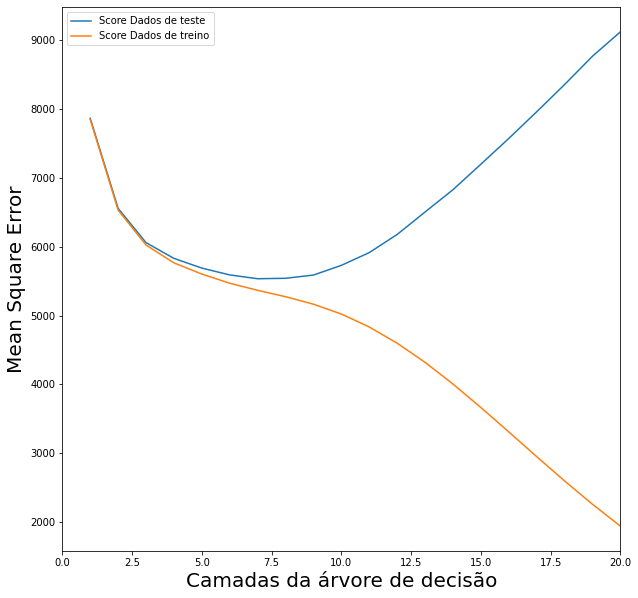

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(mse.index, mse.test_score, label='Score Dados de teste')
sns.lineplot(mse.index, mse.train_score, label='Score Dados de treino')
plt.xlabel('Camadas da árvore de decisão', fontsize=20)
plt.xlim(0,20)
plt.ylabel('Mean Square Error', fontsize=20)

Como é possível ver, aumentar o número de camadas da árvore de decisão sempre ajuda a melhorar o resultado do modelo de treino. O mesmo não ocorre com os resultados de teste.  É possível notar uma melhora até 7 camadas da árvore. Depois disso, o modelo de teste passa a ter resultados piores. 

Isso ocorre pois o modelo começa a "decorar os resultados de treino e ficar muito bom para prever esses dados, porém quando tenta prever os resultados de teste, ele passa a retornar resultados muito ruins, pois ele está viciado nos resultados de treino. Esse problema é conhecido como "overfiting".

Esse processo pode ser repetido também para outros parâmetros da árvore de decisão (como o **max_leaf_nodes** ) até que se tenha a melhor configuração possível para uma árvore de decisão.

In [ ]:
mse = pd.DataFrame()
for i in range(1,500,2):
    # Setar SEED:
    SEED=1234
    np.random.seed(SEED)
    # instanciar KFold
    partes = KFold(n_splits=10, shuffle=True)
    # Selecionar o modelo
    modelo_DecisionTreeRegressor = DecisionTreeRegressor(max_leaf_nodes=i)
    y_DecisionTreeRegressor_cross_valid = cross_validate(modelo_DecisionTreeRegressor,
                                                         X, y, cv=partes,
                                                         scoring='neg_mean_squared_error',
                                                         return_train_score=True,
                                                         )
    res = calcula_erro(y_DecisionTreeRegressor_cross_valid['test_score'])
    res= pd.DataFrame(data=[
                            [
                             y_DecisionTreeRegressor_cross_valid['fit_time'].mean(),
                             y_DecisionTreeRegressor_cross_valid['score_time'].mean(),
                             y_DecisionTreeRegressor_cross_valid['test_score'].mean()*-1,
                             y_DecisionTreeRegressor_cross_valid['train_score'].mean()*-1,
                             res[1], res[2],res[3]
                             ]
                            ],
                      columns= ['fit_time', 'score_time', 'test_score', 
                                'train_score','desv_pad', 'lim_sup', 'lim_inf'],
                      index=[i]
                      )
    mse = mse.append(res)
mse

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(mse.index, mse.test_score, label='Score Dados de teste')
sns.lineplot(mse.index, mse.train_score, label='Score Dados de treino')
plt.xlabel('Número Máximo de "Folhas" por Nó da Árvore de Decisão', fontsize=20)
plt.ylabel('Mean Square Error', fontsize=20)
plt.grid()

Nesse útimo gráfico é facil notar que conforme aumentamos o número máximo de "folhas" por nó, diminuimos o erro do modelo. Contudo, da mesma forma que vimos para o estudo de variação de camadas, o erro aumenta após um certo valor de "folhas" por nó.

Dessa forma temos que buscar a combinação de parâmetros da árvore de decisão que apresente melhor resultados para o estudo.

Bom, isso é tudo por hoje. 

Essa áula foi a última da série de #ImersãoDados promovida pela Alura. Espero que eu tenha conseguido transmitir o conhecimento de forma clara para todos.

Até a próxima!